In [2]:

import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as LA
from mpl_toolkits.mplot3d import Axes3D

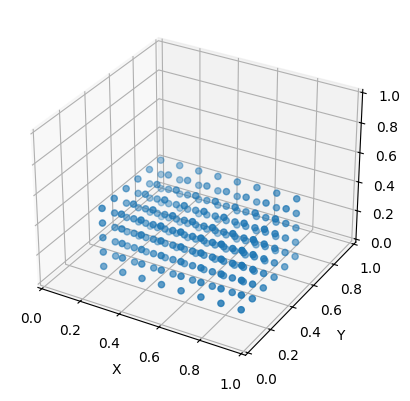

In [20]:
import MAIN as m

cube=m.create_cubic_object((0.5,0.5),0.7,0.5,0.1)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the cube data
ax.scatter(cube[:, 0], cube[:, 1], cube[:, 2], marker='o')

# Set labels for each axis
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')


# Set the same range for all axes
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

# Show the plot
plt.show()

In [30]:


means = np.mean(cube, axis=0)
cov = np.cov(cube,rowvar=False)
print(cov)
eval, evec = LA.eig(cov)
print(eval, evec)

print(np.rad2deg(np.arccos(np.dot(evec[:,0], evec[:,1]))))
print(np.rad2deg(np.arccos(np.dot(evec[:,1], evec[:,2]))))
print(np.rad2deg(np.arccos(np.dot(evec[:,2], evec[:,0]))))


[[ 5.27196653e-02 -2.99620858e-18 -5.76015293e-19]
 [-2.99620858e-18  2.92887029e-02  1.74198173e-20]
 [-5.76015293e-19  1.74198173e-20  2.00836820e-02]]
[0.05271967 0.0292887  0.02008368] [[ 1.00000000e+00 -1.27873902e-16  1.76496994e-17]
 [ 0.00000000e+00 -1.00000000e+00  1.55271548e-17]
 [ 0.00000000e+00  6.26406674e-17  1.00000000e+00]]
90.00000000000001
90.0
90.0


[[ 5.27196653e-02 -2.99620858e-18 -5.76015293e-19]
 [-2.99620858e-18  2.92887029e-02  1.74198173e-20]
 [-5.76015293e-19  1.74198173e-20  2.00836820e-02]]
[0.05271967 0.0292887  0.02008368] [[ 1.00000000e+00 -1.27873902e-16  1.76496994e-17]
 [ 0.00000000e+00 -1.00000000e+00  1.55271548e-17]
 [ 0.00000000e+00  6.26406674e-17  1.00000000e+00]]


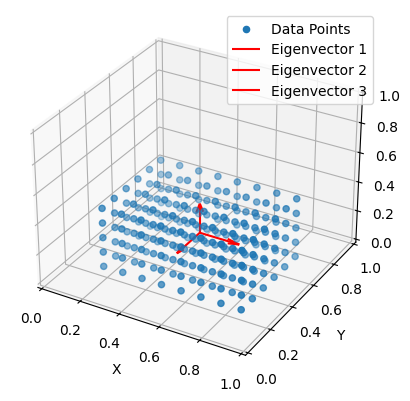

In [39]:
import MAIN as m
# Assuming cube is your dataset
cube = m.create_cubic_object((0.5, 0.5), 0.7, 0.5, 0.1)

# Assuming you have the covariance matrix and eigenvectors
cov_matrix = np.cov(cube, rowvar=False)
print(cov_matrix)
eval, evec = np.linalg.eig(cov_matrix)
print(eval,evec)
eval=eval*2

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the cube data
ax.scatter(cube[:, 0], cube[:, 1], cube[:, 2], marker='o', label='Data Points')

# Set labels for each axis
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set the same range for all axes
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

# Plot eigenvectors
origin = np.mean(cube, axis=0)
scale_factor = 0.2  # Adjust as needed for visualization
for i in range(3):
    ax.quiver(origin[0], origin[1], origin[2], evec[0, i], evec[1, i], evec[2, i],
              color='r', length=scale_factor, normalize=True, label=f'Eigenvector {i + 1}')

# Show the plot
ax.legend()
plt.show()

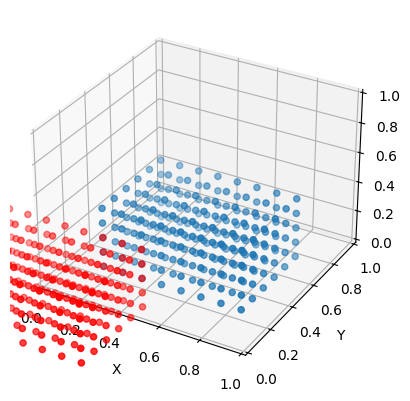

In [32]:
centered_data = cube - means



import MAIN as m

cube=m.create_cubic_object((0.5,0.5),0.7,0.5,0.1)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the cube data
ax.scatter(cube[:, 0], cube[:, 1], cube[:, 2], marker='o')
ax.scatter(centered_data[:, 0], centered_data[:, 1], centered_data[:, 2], marker='o',color='r')

# Set labels for each axis
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')


# Set the same range for all axes
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

# Show the plot
plt.show()



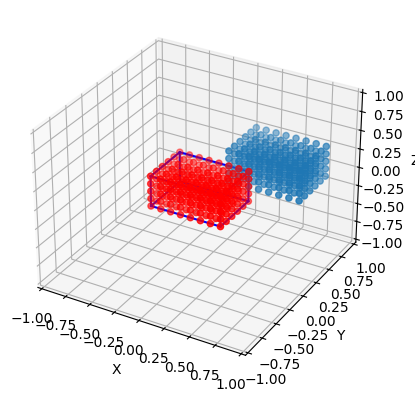

In [33]:
def draw3DRectangle(ax, x1, y1, z1, x2, y2, z2):
    # the Translate the datatwo sets of coordinates form the apposite diagonal points of a cuboid
    ax.plot([x1, x2], [y1, y1], [z1, z1], color='b') # | (up)
    ax.plot([x2, x2], [y1, y2], [z1, z1], color='b') # -->
    ax.plot([x2, x1], [y2, y2], [z1, z1], color='b') # | (down)
    ax.plot([x1, x1], [y2, y1], [z1, z1], color='b') # <--

    ax.plot([x1, x2], [y1, y1], [z2, z2], color='b') # | (up)
    ax.plot([x2, x2], [y1, y2], [z2, z2], color='b') # -->
    ax.plot([x2, x1], [y2, y2], [z2, z2], color='b') # | (down)
    ax.plot([x1, x1], [y2, y1], [z2, z2], color='b') # <--
    
    ax.plot([x1, x1], [y1, y1], [z1, z2], color='b') # | (up)
    ax.plot([x2, x2], [y2, y2], [z1, z2], color='b') # -->
    ax.plot([x1, x1], [y2, y2], [z1, z2], color='b') # | (down)
    ax.plot([x2, x2], [y1, y1], [z1, z2], color='b') # <--


#= np.min(cube[0, :]), np.max(cube[0, :]), np.min(cube[1, :]), np.max(cube[1, :]), np.min(cube[2, :]), np.max(cube[2, :])
xmin, ymin, zmin = np.min(centered_data, axis=0)
xmax, ymax, zmax = np.max(centered_data, axis=0)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the cube data
ax.scatter(cube[:, 0], cube[:, 1], cube[:, 2], marker='o')
ax.scatter(centered_data[:, 0], centered_data[:, 1], centered_data[:, 2], marker='o',color='r')

# Set labels for each axis
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')


# Set the same range for all axes
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([0-1, 1])


draw3DRectangle(ax, xmin, ymin, zmin, xmax, ymax, zmax)



# Show the plot
plt.show()

In [34]:
aligned_coords = np.matmul(evec.T, centered_data)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(aligned_coords[0,:], aligned_coords[1,:], aligned_coords[2,:], color='g', label="rotated/aligned data")
ax.scatter(centered_data[0,:], centered_data[1,:], centered_data[2,:], color='orange', label="centered data")
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 240 is different from 3)

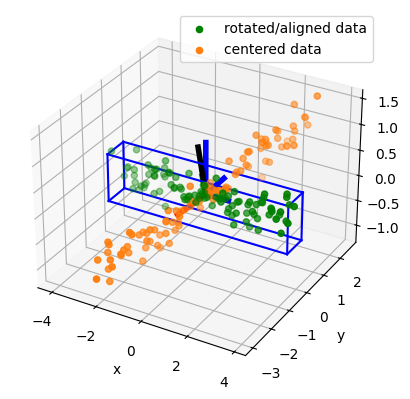

In [10]:
xmin, xmax, ymin, ymax, zmin, zmax = np.min(aligned_coords[0, :]), np.max(aligned_coords[0, :]), np.min(aligned_coords[1, :]), np.max(aligned_coords[1, :]), np.min(aligned_coords[2, :]), np.max(aligned_coords[2, :])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(aligned_coords[0,:], aligned_coords[1,:], aligned_coords[2,:], color='g', label="rotated/aligned data")
ax.scatter(centered_data[0,:], centered_data[1,:], centered_data[2,:], color='tab:orange', label="centered data")
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# cartesian basis
ax.plot([0, 1],  [0, 0], [0, 0], color='b', linewidth=4)
ax.plot([0, 0],  [0, 1], [0, 0], color='b', linewidth=4)
ax.plot([0, 0],  [0, 0], [0, 1], color='b', linewidth=4)
# eigen basis
ax.plot([0, evec[0, 0]],  [0, evec[1, 0]], [0, evec[2, 0]], color='r', linewidth=4)
ax.plot([0, evec[0, 1]],  [0, evec[1, 1]], [0, evec[2, 1]], color='g', linewidth=4)
ax.plot([0, evec[0, 2]],  [0, evec[1, 2]], [0, evec[2, 2]], color='k', linewidth=4)

draw3DRectangle(ax, xmin, ymin, zmin, xmax, ymax, zmax)

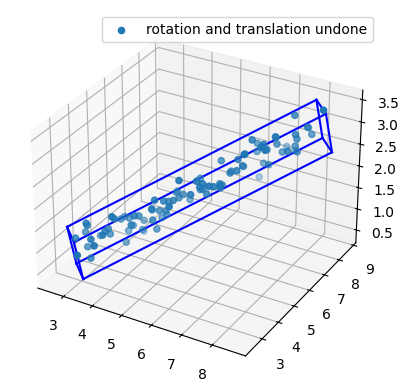

In [12]:
rectCoords = lambda x1, y1, z1, x2, y2, z2: np.array([[x1, x1, x2, x2, x1, x1, x2, x2],
                                                      [y1, y2, y2, y1, y1, y2, y2, y1],
                                                      [z1, z1, z1, z1, z2, z2, z2, z2]])

realigned_coords = np.matmul(evec, aligned_coords)
realigned_coords += means[:, np.newaxis]

rrc = np.matmul(evec, rectCoords(xmin, ymin, zmin, xmax, ymax, zmax))
# rrc = rotated rectangle coordinates

rrc += means[:, np.newaxis] 


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(realigned_coords[0,:], realigned_coords[1,:], realigned_coords[2,:], label="rotation and translation undone")
ax.legend()

# z1 plane boundary
ax.plot(rrc[0, 0:2], rrc[1, 0:2], rrc[2, 0:2], color='b')
ax.plot(rrc[0, 1:3], rrc[1, 1:3], rrc[2, 1:3], color='b')
ax.plot(rrc[0, 2:4], rrc[1, 2:4], rrc[2, 2:4], color='b')
ax.plot(rrc[0, [3,0]], rrc[1, [3,0]], rrc[2, [3,0]], color='b')

# z2 plane boundary
ax.plot(rrc[0, 4:6], rrc[1, 4:6], rrc[2, 4:6], color='b')
ax.plot(rrc[0, 5:7], rrc[1, 5:7], rrc[2, 5:7], color='b')
ax.plot(rrc[0, 6:], rrc[1, 6:], rrc[2, 6:], color='b')
ax.plot(rrc[0, [7, 4]], rrc[1, [7, 4]], rrc[2, [7, 4]], color='b')

# z1 and z2 connecting boundaries
ax.plot(rrc[0, [0, 4]], rrc[1, [0, 4]], rrc[2, [0, 4]], color='b')
ax.plot(rrc[0, [1, 5]], rrc[1, [1, 5]], rrc[2, [1, 5]], color='b')
ax.plot(rrc[0, [2, 6]], rrc[1, [2, 6]], rrc[2, [2, 6]], color='b')
ax.plot(rrc[0, [3, 7]], rrc[1, [3, 7]], rrc[2, [3, 7]], color='b')